## Time series EDA. Day 2

1) Simple moving average

2) Cumulative moving average

3) Exponential weighted moving average

4) Moving average (formula) -> ACF (auto correlation function)

5) Autoregressive model -> PACF (partial auto correlation function)

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime


In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-23,51.534000,50.660000,51.077999,50.956001,16601000.0,50.956001
2017-03-24,52.778000,51.001999,51.139999,52.632000,28236500.0,52.632000
2017-03-27,54.113998,51.950001,52.119999,54.043999,31154000.0,54.043999
2017-03-28,56.136002,55.000000,55.403999,55.490002,39938000.0,55.490002
2017-03-29,55.919998,55.108002,55.667999,55.476002,18381000.0,55.476002
...,...,...,...,...,...,...
2022-03-17,875.000000,825.719971,830.989990,871.599976,22194300.0,871.599976
2022-03-18,907.849976,867.390015,874.489990,905.390015,33408500.0,905.390015
2022-03-21,942.849976,907.090027,914.979980,921.159973,27327200.0,921.159973


## Simple moving average

<AxesSubplot:xlabel='Date'>

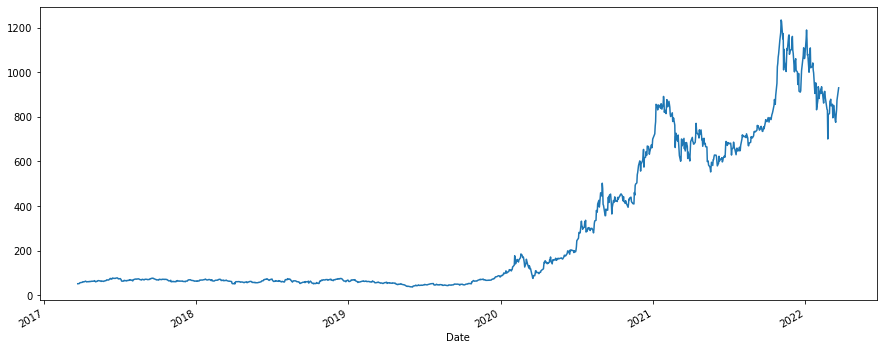

In [3]:
df_tesla['Open'].plot(figsize=(15,6))

In [4]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

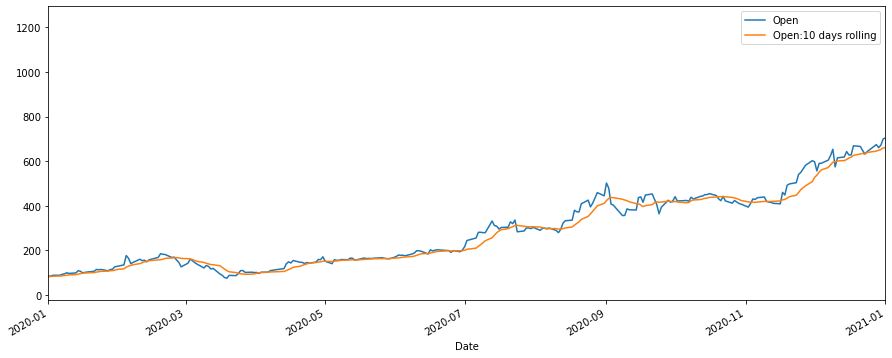

In [5]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'],figsize=(15,6))

In [6]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

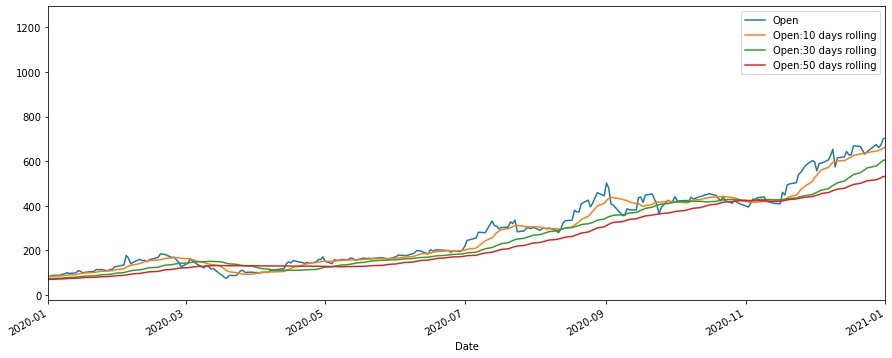

In [7]:
df_tesla[['Open','Open:10 days rolling', 'Open:30 days rolling', 'Open:50 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'],figsize=(15,6))

**Disadvantage of SMA:**

Similar importance to all the data. 

in Time Series **recent data** should have higher value

## Cumulative moving average

<AxesSubplot:xlabel='Date'>

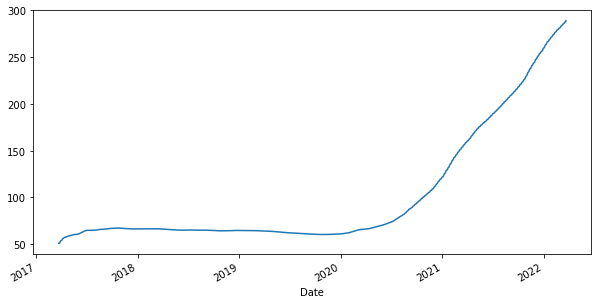

In [8]:
# expanding

df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

### Exponential Weighted Moving Average

```
EMWA(t) = a * X(t) + (1-a) * EMWA (t-1)
```

a --- вес
